In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', infer_datetime_format=True)

In [112]:
#adding some categories
data['VIOLATION TYPE'] = data['VIOLATION CODE'].astype(str).apply(lambda x: x[:-1])

In [113]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,VIOLATION TYPE
0,50015634,"CARVEL ICE CREAM, DAYLIGHT DONUTS, KUNG FU TEA",MANHATTAN,9,BROADWAY,10004.0,2127855688,"Ice Cream, Gelato, Yogurt, Ices",07/26/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,34.0,NaN,NaN,10/28/2018,Cycle Inspection / Initial Inspection,06
1,50011359,AKI SUSHI,MANHATTAN,1531,YORK AVE,10028.0,9177709928,Japanese,11/06/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,33.0,C,11/06/2017,10/28/2018,Cycle Inspection / Re-inspection,10
2,50046999,KENNEDY FRIED CHICKEN & GRILL,BROOKLYN,255,KINGSTON AVE,11213.0,3476495981,American,04/15/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,04/15/2016,10/28/2018,Pre-permit (Operational) / Initial Inspection,08
3,50000020,SAPORITO PIZZA & RESTAURANT,STATEN ISLAND,896,HUGUENOT AVE,10312.0,7182276300,Pizza/Italian,10/24/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,10/24/2018,10/28/2018,Cycle Inspection / Initial Inspection,10
4,50002734,SALZA PIZZA,QUEENS,73-17,WOODSIDE AVE,11377.0,7186061919,Pizza,08/15/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,08/15/2018,10/28/2018,Cycle Inspection / Re-inspection,08


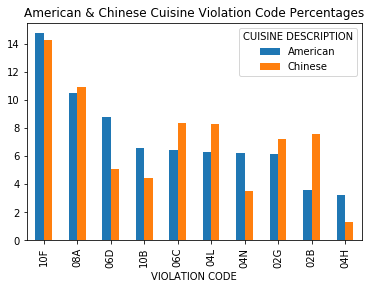

In [101]:
#First Plot
temp = data[data['CUISINE DESCRIPTION'].isin(['American','Chinese'])]
temp = temp.groupby(['VIOLATION CODE','CUISINE DESCRIPTION']).count().unstack()['CAMIS']
ame_sum, china_sum = temp.sum()
temp['American'] = temp['American']/ame_sum*100
temp['Chinese'] = temp['Chinese']/china_sum*100
a = temp.sort_values(by='American',ascending=False).head(10).plot(kind='bar', title='American & Chinese Cuisine Violation Code Percentages')

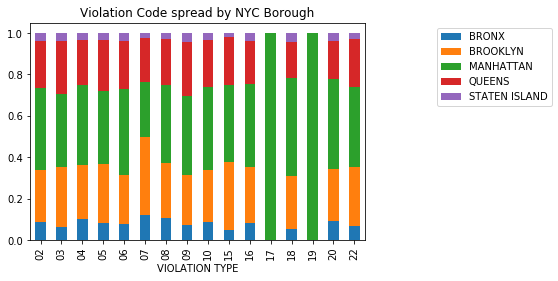

In [165]:
#Second Plot
temp = data.groupby(['VIOLATION TYPE','BORO']).count().unstack()['CAMIS'].drop('na', axis=0)
temp = temp.drop('Missing', axis =1)
a = temp.div(temp.sum(1), axis=0).plot(kind='bar', stacked=True,
                                       title='Violation Code spread by NYC Borough').legend(bbox_to_anchor=(1.2, 1))


In [160]:
data[data['VIOLATION TYPE']== '17']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,VIOLATION TYPE
47089,41494135,LE PAIN QUOTiDIEN,MANHATTAN,2,WEST 69 STREET,10023.0,6462333768,Sandwiches,09/05/2017,Violations were cited in the following area(s).,17A,NaN,Not Applicable,12.0,A,09/05/2017,10/28/2018,Cycle Inspection / Re-inspection,17
139397,41470674,ONE AND ONE,MANHATTAN,12,1 AVENUE,10009.0,2125989126,Irish,02/21/2018,Violations were cited in the following area(s).,17A,NaN,Not Applicable,18.0,NaN,NaN,10/28/2018,Cycle Inspection / Initial Inspection,17
329859,41429072,PICCOLA CUCINA,MANHATTAN,184,PRINCE STREET,10012.0,2126253200,Italian,08/27/2018,Violations were cited in the following area(s).,17A,NaN,Not Applicable,28.0,NaN,NaN,10/28/2018,Cycle Inspection / Initial Inspection,17


In [161]:
data[data['VIOLATION TYPE']== '19']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,VIOLATION TYPE
222165,50066902,HILTON GARDEN INN,MANHATTAN,6,WATER ST,10004.0,2122481100,American,09/20/2017,Violations were cited in the following area(s).,19A,NaN,Not Applicable,12.0,NaN,NaN,10/28/2018,Pre-permit (Non-operational) / Initial Inspection,19
268793,50012615,PARK HYATT NEW YORK,MANHATTAN,153,W 57TH ST,10019.0,6467741234,American,10/03/2017,Violations were cited in the following area(s).,19A,NaN,Not Applicable,13.0,A,10/03/2017,10/28/2018,Cycle Inspection / Initial Inspection,19
